### **Análise dos da PRF de 2025** ###

In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
FILE_ZIP = './../data.zip'
FILE_DATA = 'acidentes2025_todas_causas_tipos.csv'

with zipfile.ZipFile(FILE_ZIP, 'r') as zf:
    with zf.open(FILE_DATA) as file:
        df = pd.read_csv(file, sep=';', encoding='ISO-8859-1')

### Selecionando as colunas ###

In [23]:
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [4]:
columns = [
    'data_inversa',
    'uf',
    'br',
    'km',
    'municipio',
    'causa_principal',
    'causa_acidente',
    'feridos_leves',
    'feridos_graves',
    'mortos',
    'sexo',
    'fase_dia',
    'latitude',
    'longitude'
]

df = df[columns]

- Estrutura dos dados

In [25]:
display(df.isnull().sum())
display(df.dtypes)

data_inversa           0
uf                     0
br                   860
km                   860
municipio              0
causa_principal        0
causa_acidente         0
feridos_leves      32739
feridos_graves     32739
mortos             32739
sexo               32739
fase_dia               0
latitude               0
longitude              0
dtype: int64

data_inversa        object
uf                  object
br                 float64
km                  object
municipio           object
causa_principal     object
causa_acidente      object
feridos_leves      float64
feridos_graves     float64
mortos             float64
sexo                object
fase_dia            object
latitude            object
longitude           object
dtype: object

### Tratamento dos dados ###

- **Tratando as coordenadas**

In [5]:
for col in ['latitude', 'longitude']:
  df[col] = df[col].str.replace(',', '.').astype('float64')

- **Preenchendo com zeros os valores nulos**



In [6]:
for col in ['feridos_leves', 'feridos_graves', 'mortos']:
    df[col] = df[col].fillna(0).astype('int64')


- **Preenchendo com não informado**



In [7]:
for col in ['br', 'km', 'sexo']:
    df[col] = df[col].fillna('não informado').astype('str')

- **Criando uma coluna de total de feridos**

In [8]:
df['feridos'] = df['feridos_leves'] + df['feridos_graves']

- **Deletando as colunas**

In [9]:
df.drop(['feridos_leves', 'feridos_graves'], axis=1, inplace=True)

- **Renomeando a coluna de data**

In [10]:
df.rename(columns={'data_inversa':'data'}, inplace=True)

- **Nova estrutura dos dados**

In [32]:
display(df.head())
display(df.tail())
display(df.isnull().sum())
display(df.dtypes)

,data,uf,br,km,municipio,causa_principal,causa_acidente,mortos,sexo,fase_dia,latitude,longitude,feridos
0,2025-01-01,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,Reação tardia ou ineficiente do condutor,0,Não Informado,Plena Noite,-8.207607,-34.983720,0
1,2025-01-01,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,Reação tardia ou ineficiente do condutor,0,Feminino,Plena Noite,-8.207607,-34.983720,1
2,2025-01-01,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,Reação tardia ou ineficiente do condutor,0,Masculino,Plena Noite,-8.207607,-34.983720,1
3,2025-01-01,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,Reação tardia ou ineficiente do condutor,0,Não Informado,Plena Noite,-8.207607,-34.983720,0
4,2025-01-01,SC,101.0,120,ITAJAI,Sim,Ausência de reação do condutor,0,Feminino,Plena Noite,-26.912758,-48.711998,1


,data,uf,br,km,municipio,causa_principal,causa_acidente,mortos,sexo,fase_dia,latitude,longitude,feridos
329671,2025-07-13,AL,104.0,53,MURICI,Não,Ausência de reação do condutor,0,Masculino,Plena Noite,-9.263035,-35.967401,0
329672,2025-07-13,AL,104.0,53,MURICI,Não,Ingestão de álcool pelo condutor,1,Masculino,Plena Noite,-9.263035,-35.967401,0
329673,2025-07-13,AL,104.0,53,MURICI,Não,Ingestão de álcool pelo condutor,0,Masculino,Plena Noite,-9.263035,-35.967401,0
329674,2025-07-13,AL,104.0,53,MURICI,Não,Condutor Dormindo,1,Masculino,Plena Noite,-9.263035,-35.967401,0
329675,2025-07-13,AL,104.0,53,MURICI,Não,Condutor Dormindo,0,Masculino,Plena Noite,-9.263035,-35.967401,0


data               0
uf                 0
br                 0
km                 0
municipio          0
causa_principal    0
causa_acidente     0
mortos             0
sexo               0
fase_dia           0
latitude           0
longitude          0
feridos            0
dtype: int64

data                object
uf                  object
br                  object
km                  object
municipio           object
causa_principal     object
causa_acidente      object
mortos               int64
sexo                object
fase_dia            object
latitude           float64
longitude          float64
feridos              int64
dtype: object

- **Exportando**

In [33]:
df.to_csv('./../dataready/acidentes_PRF_2025.csv', sep=';', index=False)

### **Total de mortes e feridos** ###

In [34]:
print(f'Total de feridos {df['feridos'].sum()}')
print(f'Total de mortos {df['mortos'].sum()}')
print(f'Total de acidentes {df.shape[0]}')

Total de feridos 137683
Total de mortos 16114
Total de acidentes 329676


- **Fase do dia e sexo das vitimas**

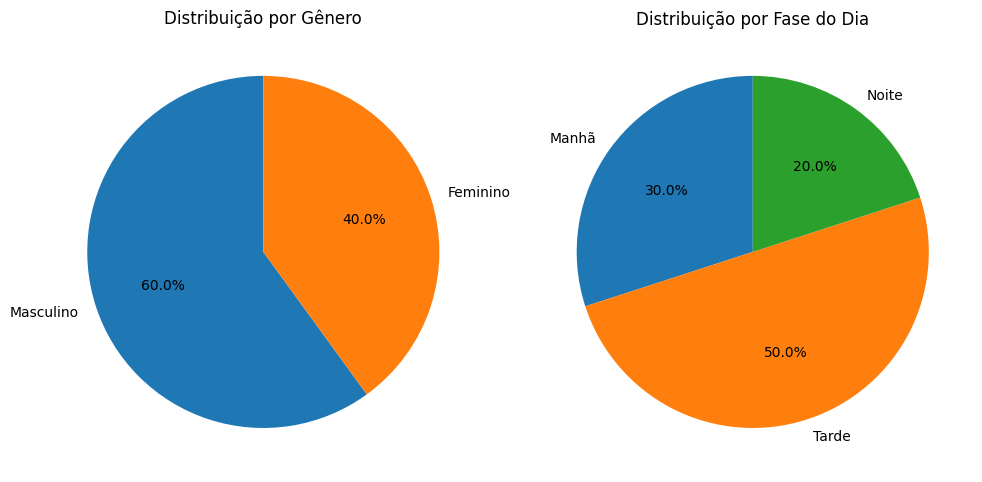

In [37]:


gender = pd.Series({'Masculino': 0.6, 'Feminino': 0.4})
day = pd.Series({'Manhã': 0.3, 'Tarde': 0.5, 'Noite': 0.2})

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Distribuição por Gênero')
ax[1].pie(day, labels=day.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribuição por Fase do Dia')

plt.tight_layout()
plt.savefig('./../fig/pct_genero_fase_dia.png', dpi=300)
plt.show()

### **Estados e municipios com mais feridos nas BRs** ###    

- **Feridos por UF**

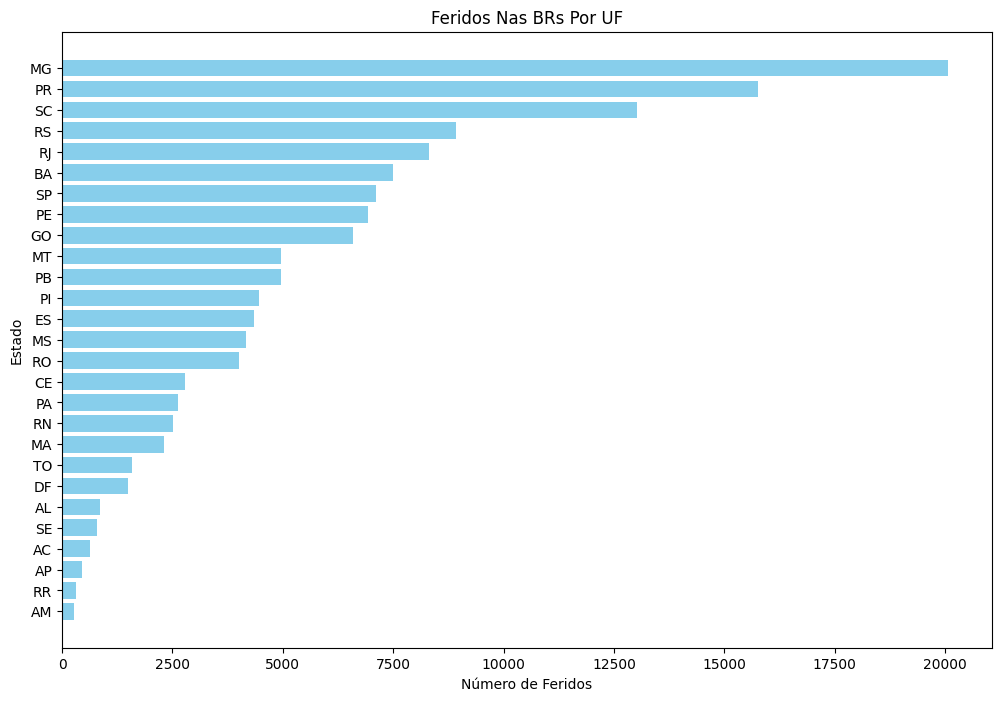

In [39]:

### Agregando a soma de feridos por UF ###
state = df.groupby('uf')['feridos'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(state.index, state.values, color='skyblue')
plt.title('Feridos Nas BRs Por UF')
plt.xlabel('Número de Feridos')
plt.ylabel('Estado')
plt.gca().invert_yaxis()
plt.savefig('./../fig/feridos_uf.png', dpi=300)
plt.show()

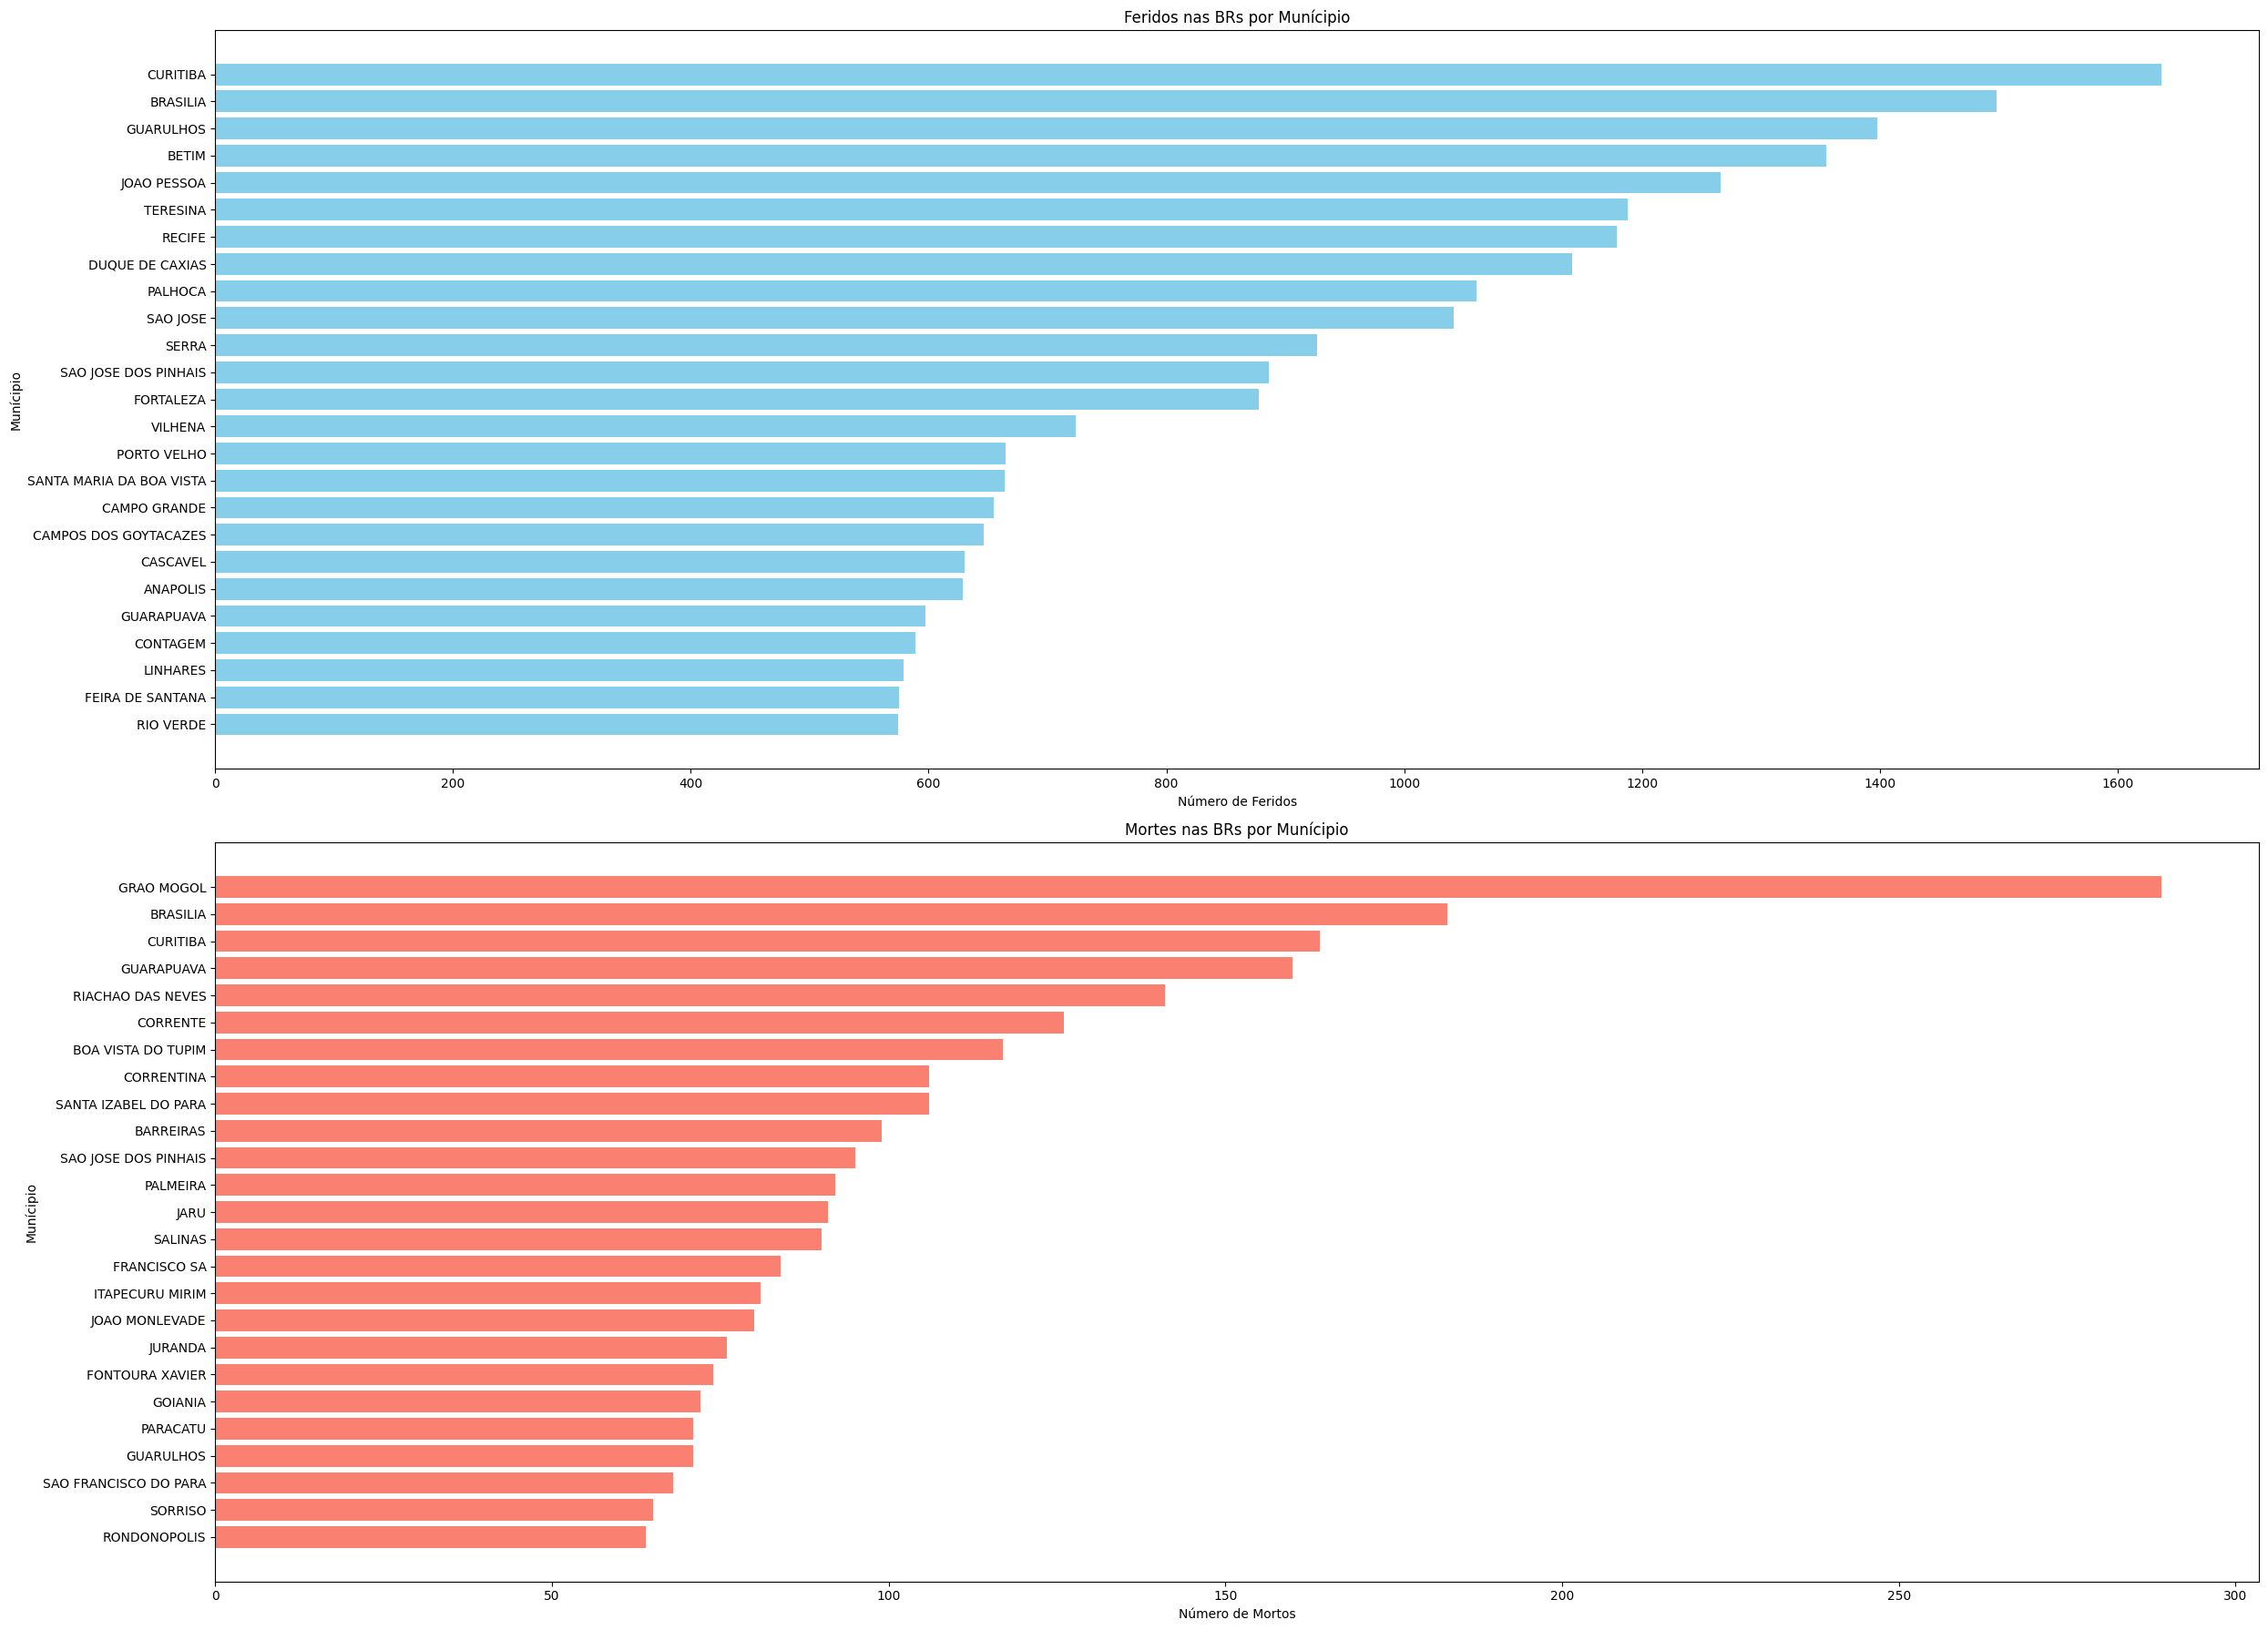

In [33]:
city = df.groupby('municipio')['feridos'].sum().sort_values(ascending=False).iloc[0:25]
city_deaf = df.groupby('municipio')['mortos'].sum().sort_values(ascending=False).iloc[0:25]

fig, axes = plt.subplots(2,1, sharex=False, sharey=False, figsize=(25,18))


### Feridos ###
axes[0].barh(city.index, city.values, color='skyblue')
axes[0].set_title('Feridos nas BRs por Munícipio')
axes[0].set_xlabel('Número de Feridos')
axes[0].set_ylabel('Munícipio')
axes[0].invert_yaxis()

### Mortos ###
axes[1].barh(city_deaf.index, city_deaf.values, color='salmon')
axes[1].set_title('Mortes nas BRs por Munícipio')
axes[1].set_xlabel('Número de Mortos')
axes[1].set_ylabel('Munícipio')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('./../fig/municipio.png', dpi=300)
plt.show()

>A visualização por estado revela que a região Sul (SC, PR, RS), juntamente com Minas Gerais no Sudeste, concentra o maior número de feridos nas BRs.

>Já a visualização por município mostra um padrão interessante e diferente: a forte presença de cidades da região Nordeste, indicando que a alta incidência de feridos se espalha por grandes centros urbanos de diversas partes do país, e não se limita a uma única região.

- Feridos por BR
- Mortos por BR

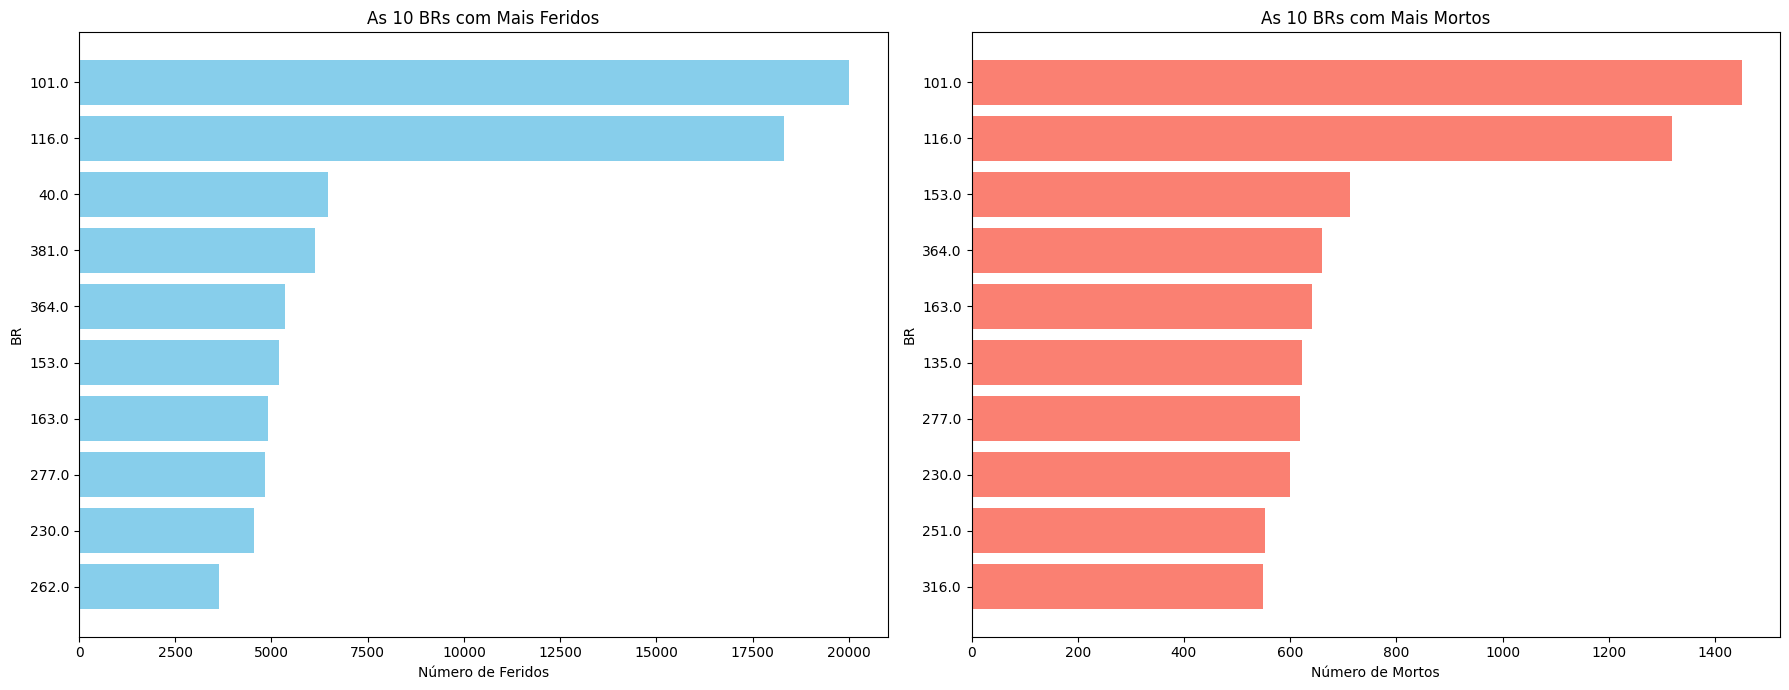

In [31]:


br_fer = df.groupby('br')['feridos'].sum().sort_values(ascending=False).iloc[0:10]
br_mor = df.groupby('br')['mortos'].sum().sort_values(ascending=False).iloc[0:10]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

### Feridos ###
axes[0].barh(br_fer.index, br_fer.values, color='skyblue')
axes[0].set_title('As 10 BRs com Mais Feridos')
axes[0].set_xlabel('Número de Feridos')
axes[0].set_ylabel('BR')
axes[0].invert_yaxis()

### Mortos ###
axes[1].barh(br_mor.index, br_mor.values, color='salmon')
axes[1].set_title('As 10 BRs com Mais Mortos')
axes[1].set_xlabel('Número de Mortos')
axes[1].set_ylabel('BR')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('./../fig/br_mortos_feridos.png', dpi=300)
plt.show()

### **Causas dos acidentes** ###

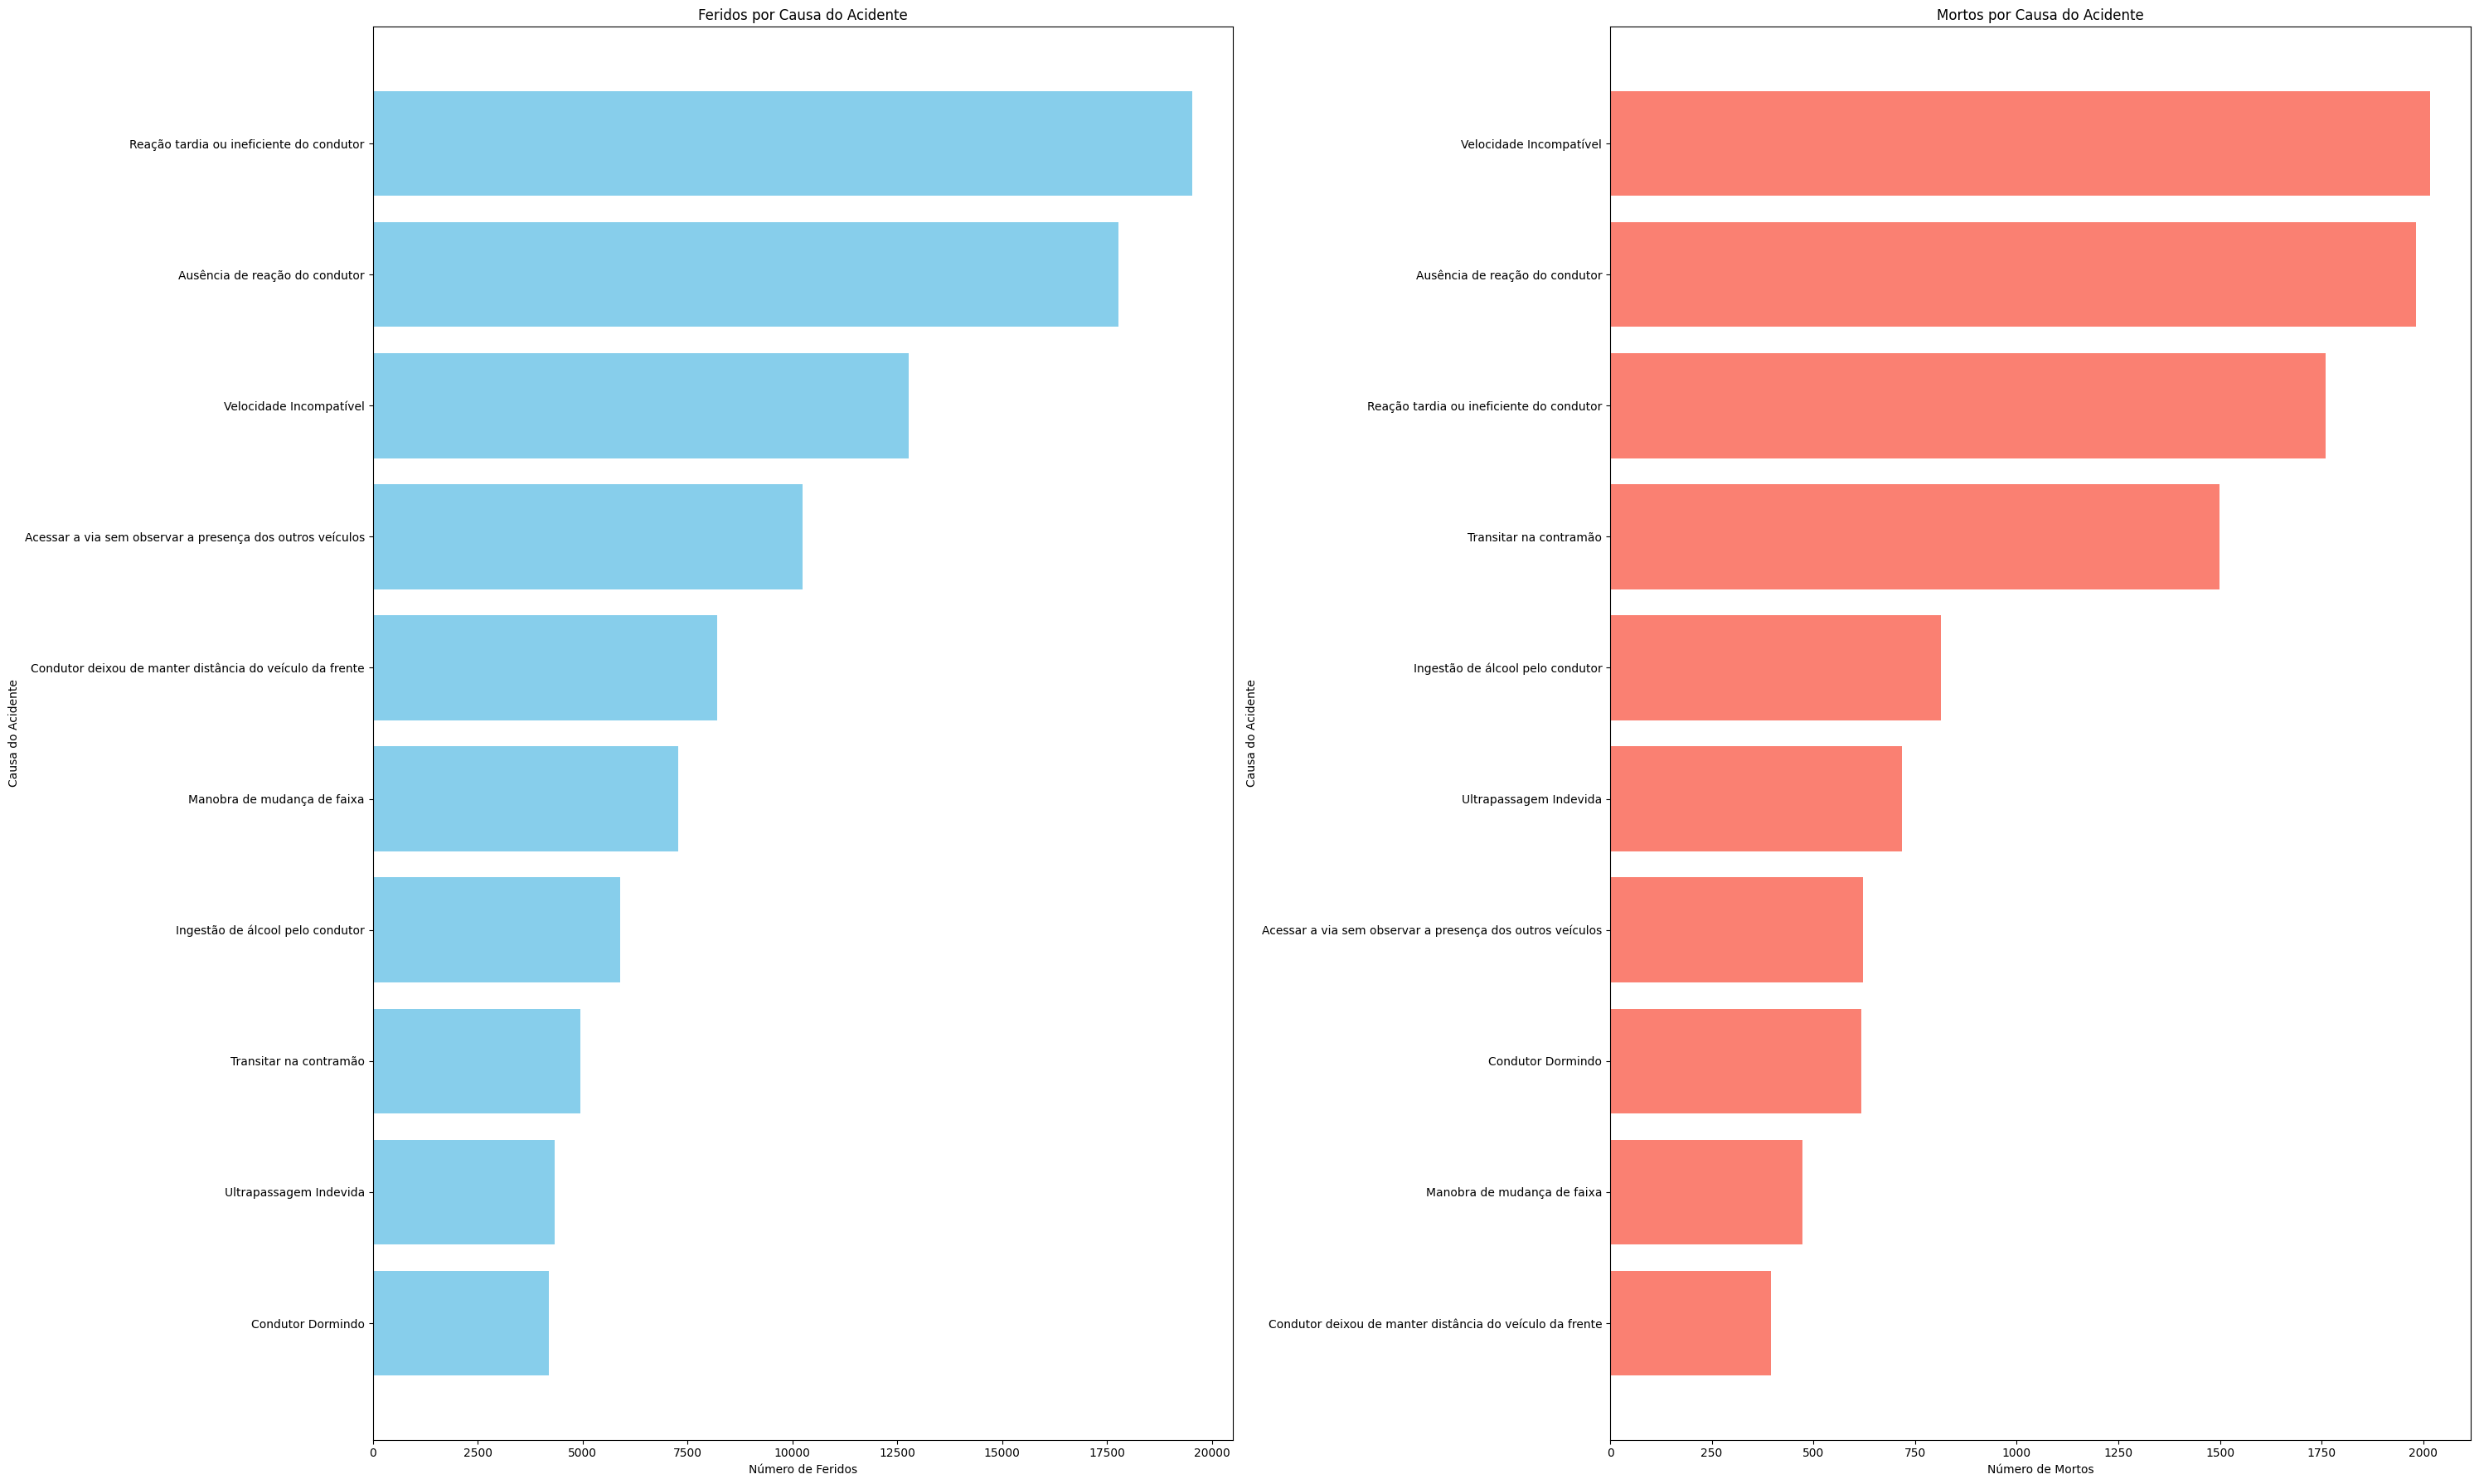

In [30]:

ci = df.groupby('causa_acidente')['feridos'].sum().sort_values(ascending=False).iloc[0:10]
cd = df.groupby('causa_acidente')['mortos'].sum().sort_values(ascending=False).iloc[0:10]

# Configura a figura e os subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 18))

### Gráfico de Feridos ###
axes[0].barh(ci.index, ci.values, color='skyblue')
axes[0].set_title('Feridos por Causa do Acidente')
axes[0].set_xlabel('Número de Feridos')
axes[0].set_ylabel('Causa do Acidente')
axes[0].invert_yaxis()

### Gráfico de Mortos ###
axes[1].barh(cd.index, cd.values, color='salmon')
axes[1].set_title('Mortos por Causa do Acidente')
axes[1].set_xlabel('Número de Mortos')
axes[1].set_ylabel('Causa do Acidente')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('./../fig/causas_acidentes.png', dpi=350)
plt.show()

> **A reação tardia ou a ausência de reação do condutor são as principais causas de acidentes com feridos.**

> **A velocidade incompatível é a principal causa de acidentes mortais, reforçando o perigo do excesso de velocidade nas rodovias.**